<h1 style="
    background: linear-gradient(90deg, #3498db, #9b59b6, #e74c3c);
    background-size: 300% auto;
    color: white;
    padding: 15px;
    border-radius: 8px;
    text-align: center;
    animation: gradient 5s ease infinite;
">Factor Analysis (Place Data)</h1>

<script>
document.currentScript.parentNode.innerHTML += `
<style>
@keyframes gradient {
    0% {background-position: 0%}
    50% {background-position: 100%}
    100% {background-position: 0%}
}
</style>`;
</script>

In [586]:
%%html


<!DOCTYPE html>
<html>
<head>
    <style>
        .container {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            max-width: 850px;
            margin: 0 auto;
            padding: 20px;
            background-color: #f7f9fc;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        }
        .header {
            background: linear-gradient(135deg, #4a8fe7, #5e72e4);
            color: white;
            padding: 15px;
            border-radius: 8px;
            text-align: center;
            margin-bottom: 20px;
            position: relative;
            overflow: hidden;
        }
        .header::before {
            content: '';
            position: absolute;
            top: -10px;
            left: -10px;
            right: -10px;
            bottom: -10px;
            background: linear-gradient(45deg, rgba(255,255,255,0) 0%, rgba(255,255,255,0.2) 50%, rgba(255,255,255,0) 100%);
            transform: rotate(45deg);
            animation: shine 3s infinite;
        }
        @keyframes shine {
            0% { transform: translateX(-300%) rotate(45deg); }
            100% { transform: translateX(300%) rotate(45deg); }
        }
        .section {
            background-color: white;
            padding: 15px;
            margin-bottom: 15px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.05);
            transition: all 0.3s ease;
        }
        .section:hover {
            transform: translateY(-3px);
            box-shadow: 0 5px 15px rgba(0,0,0,0.1);
        }
        .section h3 {
            color: #4a5568;
            border-bottom: 2px solid #e2e8f0;
            padding-bottom: 8px;
            margin-top: 0;
        }
        .objective {
            background-color: #ebf8ff;
            border-left: 4px solid #4299e1;
        }
        .step {
            cursor: pointer;
            border-radius: 5px;
            margin-bottom: 8px;
            border: 1px solid #e2e8f0;
            transition: all 0.2s ease;
        }
        .step:hover {
            background-color: #f0f7ff;
        }
        .step-content {
            display: none;
            padding: 15px;
            background-color: #f8fafc;
            border-radius: 0 0 5px 5px;
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(-10px); }
            to { opacity: 1; transform: translateY(0); }
        }
        .step.active {
            border-color: #4299e1;
            box-shadow: 0 0 0 1px #4299e1;
        }
        .step.active .step-content {
            display: block;
        }
        .step h4 {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin: 0;
            padding: 12px 15px;
            color: #2d3748;
            position: relative;
        }
        .step h4 .step-number {
            background-color: #4299e1;
            color: white;
            width: 24px;
            height: 24px;
            border-radius: 50%;
            display: inline-flex;
            justify-content: center;
            align-items: center;
            font-size: 14px;
            margin-right: 10px;
        }
        .step h4 .step-arrow {
            font-size: 12px;
            color: #718096;
            transition: transform 0.3s ease;
        }
        .step.active h4 .step-arrow {
            transform: rotate(180deg);
        }
        ul {
            margin-top: 5px;
            padding-left: 25px;
        }
        li {
            margin-bottom: 8px;
            line-height: 1.5;
        }
        .highlight {
            background-color: #fefcbf;
            padding: 2px 4px;
            border-radius: 3px;
            font-weight: 500;
        }
        .progress-container {
            background-color: #e2e8f0;
            border-radius: 8px;
            height: 10px;
            width: 100%;
            margin: 20px 0;
            overflow: hidden;
        }
        .progress-bar {
            height: 100%;
            width: 0%;
            background: linear-gradient(90deg, #4299e1, #7f9cf5);
            transition: width 0.6s ease;
            border-radius: 8px;
        }
        .btn {
            background-color: #4299e1;
            color: white;
            border: none;
            padding: 8px 16px;
            border-radius: 4px;
            cursor: pointer;
            font-size: 14px;
            margin: 5px;
            transition: all 0.2s;
        }
        .btn:hover {
            background-color: #3182ce;
            transform: translateY(-2px);
        }
        .btn:active {
            transform: translateY(0);
        }
        .visualization {
            margin-top: 20px;
            text-align: center;
            height: 180px;
            position: relative;
            background-color: #f8fafc;
            border-radius: 8px;
            padding: 10px;
            overflow: hidden;
        }
        .vis-bar {
            position: absolute;
            bottom: 20px;
            width: 40px;
            background: linear-gradient(to top, #4299e1, #90cdf4);
            border-radius: 3px 3px 0 0;
            transition: height 0.5s ease;
        }
        .vis-label {
            position: absolute;
            bottom: 0;
            text-align: center;
            width: 40px;
            font-size: 12px;
        }
        .tooltip {
            position: relative;
            display: inline-block;
            border-bottom: 1px dotted #718096;
            cursor: help;
        }
        .tooltip .tooltiptext {
            visibility: hidden;
            width: 200px;
            background-color: #2d3748;
            color: white;
            text-align: center;
            border-radius: 6px;
            padding: 5px;
            position: absolute;
            z-index: 1;
            bottom: 125%;
            left: 50%;
            margin-left: -100px;
            opacity: 0;
            transition: opacity 0.3s;
            font-size: 12px;
        }
        .tooltip:hover .tooltiptext {
            visibility: visible;
            opacity: 1;
        }
        .color-scale {
            display: flex;
            align-items: center;
            margin: 10px 0;
            gap: 5px;
        }
        .color-box {
            width: 20px;
            height: 20px;
            border-radius: 3px;
        }
        .toggle-section {
            text-align: center;
            margin: 15px 0;
        }
        .control-panel {
            display: flex;
            justify-content: space-between;
            margin-top: 15px;
        }
        .tabs {
            display: flex;
            margin-top: 20px;
        }
        .tab {
            padding: 10px 15px;
            cursor: pointer;
            background-color: #e2e8f0;
            border-radius: 5px 5px 0 0;
            margin-right: 5px;
        }
        .tab.active {
            background-color: white;
            border-top: 2px solid #4299e1;
        }
        .tab-content {
            display: none;
            padding: 15px;
            background-color: white;
            border-radius: 0 0 5px 5px;
        }
        .tab-content.active {
            display: block;
            animation: fadeIn 0.5s;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h2>Framework</h2>
        </div>
        
        <div class="tabs">
            <div class="tab active" onclick="switchTab('overview')">Overview</div>
            <div class="tab" onclick="switchTab('methodology')">Methodology</div>
            <div class="tab" onclick="switchTab('Analaysis Report')">Analaysis Report</div>
        </div>
        
        <div id="overview" class="tab-content active">
            <div class="section objective">
                <h3>Objectives</h3>
                <ul>
                    <li>To reduce the dimension of the dataset</li>
                    <li>To discover hidden factors that explain correlations among observed variables</li>
                </ul>
                
                <div class="toggle-section">
                    <button class="btn" onclick="toggleVisualDemo()">Toggle Visual Demo</button>
                </div>
                
                <div id="visual-demo" style="display: none;">
                    <div class="visualization">
                        <div class="vis-bar" id="bar1" style="left: 60px; height: 20px;"></div>
                        <div class="vis-label" style="left: 60px;">Var1</div>
                        <div class="vis-bar" id="bar2" style="left: 120px; height: 40px;"></div>
                        <div class="vis-label" style="left: 120px;">Var2</div>
                        <div class="vis-bar" id="bar3" style="left: 180px; height: 60px;"></div>
                        <div class="vis-label" style="left: 180px;">Var3</div>
                        <div class="vis-bar" id="bar4" style="left: 240px; height: 80px;"></div>
                        <div class="vis-label" style="left: 240px;">Var4</div>
                        <div class="vis-bar" id="bar5" style="left: 300px; height: 100px;"></div>
                        <div class="vis-label" style="left: 300px;">Var5</div>
                        <div class="vis-bar" id="bar6" style="left: 360px; height: 120px;"></div>
                        <div class="vis-label" style="left: 360px;">Var6</div>
                        <div class="vis-bar" id="bar7" style="left: 420px; height: 60px;"></div>
                        <div class="vis-label" style="left: 420px;">Var7</div>
                        <div class="vis-bar" id="bar8" style="left: 480px; height: 60px;"></div>
                        <div class="vis-label" style="left: 480px;">Var8</div>

                        <div class="vis-bar" id="bar9" style="left: 540px; height: 60px;"></div>
                        <div class="vis-label" style="left: 540px;">Var9</div>



                        
                        <div class="vis-bar" id="factor1" style="left: 600px; height: 140px; width: 60px; background: linear-gradient(to top, #ed8936, #fbd38d);"></div>
                        <div class="vis-label" style="left: 600px; width: 60px;">Factor 1</div>
                        <div class="vis-bar" id="factor2" style="left: 680px; height: 80px; width: 60px; background: linear-gradient(to top, #38b2ac, #9ae6b4);"></div>
                        <div class="vis-label" style="left: 680px; width: 60px;">Factor 2</div>
                    </div>
                    <div style="text-align: center; margin-top: 5px;">
                        <button class="btn" onclick="animateBars()">Run Animation</button>
                    </div>
                </div>
                
                <div class="progress-container">
                    <div class="progress-bar" id="progress-bar"></div>
                </div>
            </div>
        </div>
        
        <div id="methodology" class="tab-content">
            <div class="control-panel">
                <button class="btn" onclick="expandAll()">Expand All</button>
                <button class="btn" onclick="collapseAll()">Collapse All</button>
                <button class="btn" onclick="startTour()">Guided Tour</button>
            </div>
            
            <div class="section">
                <h3>Methodological Steps</h3>
                
                <div class="step" id="step1" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">1</span> Data Preparation</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">
                        <p>
                        
                     <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Clean the dataset by:</span>

                      </div>
                        
                        </p>
                        <ul>
                            <li>Handling missing values</li>
                            <li>Removing duplicates</li>
                            <li>Dropping unnecessary columns</li>
                            <li>Verifying statistical assumptions</li>
                        </ul>

                    </div>
                </div>
                
                <div class="step" id="step2" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">2</span> Suitability Check</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">
                                         <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Conduct Bartlett's Test of Sphericity:</span>

                      </div>
                        
                        <ul>
                            <li><span class="highlight">Significant p-value (&lt;0.05)</span> confirms sufficient correlations</li>
                        </ul>
                        <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Calculate Kaiser-Meyer-Olkin (KMO) Measure:</span>
                        </div>
                        <ul>
                            <li class="tooltip">&gt;0.6 (Adequate)
                                <span class="tooltiptext">Values between 0.6-0.7 indicate mediocre sampling adequacy</span>
                            </li>
                            <li class="tooltip">&gt;0.8 (Excellent)
                                <span class="tooltiptext">Values above 0.8 indicate the sample is highly adequate for factor analysis</span>
                            </li>
                            <li class="tooltip">&lt;0.5 (Inadequate)
                                <span class="tooltiptext">Values below 0.5 suggest the data is not suitable for factor analysis</span>
                            </li>
                        </ul>

                    </div>
                </div>
                
                <div class="step" id="step3" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">3</span> Determining the Number of Factors</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">

                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Use Eigenvalues > 1 (Kaiser's Criterion)</span>

                     </div> 

                                         <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Analyze Scree Plot (look for the "elbow" point)</span>

                     </div>
                     
                    
                    

                    </div>
                </div>
                
                <div class="step" id="step4" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">4</span> Factor Interpretation</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">
                    
                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span> Calculate factor loadings (use heatmap for visualization)</span>

                     </div>
                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span> Group variables based on loading patterns</span>

                     </div>
                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span> Assign meaningful factor names</span>

                     </div>



                    
                    </div>
                </div>
                
                <div class="step" id="step5" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">5</span> Model Evaluation</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">
                    
                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Calculate communality values</span>

                     </div>
                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Compute variance explained by each factor</span>

                     </div>

                    <div class="color-scale">
                            
                            <div class="color-box" style="background-color: #fc8181;"></div>
                            <span>Use Eigenvalues >Review total cumulative variance</span>

                     </div>

                    </div>
                </div>
                
                <div class="step" id="step6" onclick="toggleStep(this)">
                    <h4>
                        <span><span class="step-number">6</span> Downstream Application</span>
                        <span class="step-arrow">▼</span>
                    </h4>
                    <div class="step-content">
                        <p>Generate factor scores</p>
                        <p>Utilize scores for:</p>
                        <ul>
                            <li>Cluster analysis</li>
                            <li>Regression modeling</li>
                            <li>Further multivariate analyses</li>
                        </ul>
                    </div>
                </div>
            </div>
        </div>

        <div id="Analaysis Report" class="tab-content">
        <a href="https://adittoahosankabbo.github.io/Dimension_Reduction/Factor _Analaysis/FA1/" target="_blank" class="external-link"> Interactive HTML Report</a>

        
        </div>
       
</body>
</html>

<center>
  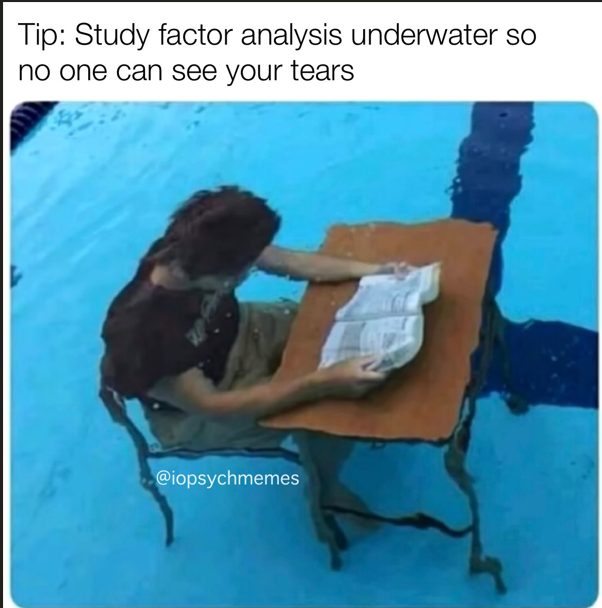
</center>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>1.Data Import & Preparation</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
df= pd.read_csv("places_tf.csv")
df.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ,id
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695,1
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489,2


In [498]:
df.shape

(329, 10)

In [499]:
df.columns

Index(['climate', 'housing', 'health', 'crime', 'trans', 'educate', 'arts',
       'recreate', 'econ', 'id'],
      dtype='object')

In [500]:
df1 = df.drop(columns=['id'])
df1.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489


In [501]:
df1.shape

(329, 9)

In [502]:
df1.columns

Index(['climate', 'housing', 'health', 'crime', 'trans', 'educate', 'arts',
       'recreate', 'econ'],
      dtype='object')

In [503]:
df1.isnull().sum()

climate     0
housing     0
health      0
crime       0
trans       0
educate     0
arts        0
recreate    0
econ        0
dtype: int64

In [504]:
# Drop rows which contain missing values
df1.dropna(inplace=True)                        #after that we will check again for missing values using isnull().sum()

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #f9fff9; font-family: Arial, sans-serif;">
  <h3 style="color: #4CAF50;">🔍 Data Cleaning Interpretation</h3>
  <ul>
    <li><strong>ID Column Removed:</strong> The <code>id</code> column was dropped as it was not relevant for the analysis.</li>
    <li><strong>Missing Values:</strong> The dataset was checked for missing or null values, but no such values were found. Hence, no imputation or removal was needed.</li>
  </ul>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>2.Adequacy Test</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [505]:
# Install the library if running 1st time
#!pip install factor-analyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df1)

(839.4267918709925, 5.995552889693395e-153)

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">🧪 Bartlett’s Test of Sphericity</h3>
  <p>Bartlett’s test is used to determine whether there is any intercorrelation between variables by comparing the observed correlation matrix with an identity matrix.</p>
  
  <ul>
    <li><strong>Null Hypothesis (H₀):</strong> The correlation matrix is an identity matrix (i.e., variables are not correlated).</li>
    <li><strong>Alternative Hypothesis (H₁):</strong> The correlation matrix is not an identity matrix (i.e., variables are intercorrelated).</li>
  </ul>
  
  <p>🧾 <strong>Test Result:</strong> The p-value from Bartlett’s test is <strong>less than 0.5</strong>, indicating that the test is statistically significant.</p>
  <p>✅ <strong>Conclusion:</strong> We reject the null hypothesis and conclude that the observed correlation matrix is <strong>not</strong> an identity matrix. This implies that there is a significant correlation between the variables.</p>
</div>


In [507]:
# KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df1)
print(kmo_model)

0.7029305838189955


<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📊 Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy</h3>
  <p>The KMO test helps evaluate whether the sample is suitable for factor analysis by measuring the proportion of variance among variables that might be common variance.</p>
  
  <ul>
    <li><strong>Interpretation Guide:</strong>
      <ul>
        <li>🔹 KMO &lt; 0.5 – Sample is inadequate for factor analysis</li>
        <li>🔹 KMO between 0.5 and 1 – Sample is adequate for factor analysis</li>
      </ul>
    </li>
    <li><strong>Observed KMO Value:</strong> <strong style="color: #2196F3;">0.703</strong></li>
  </ul>
  
  <p>✅ <strong>Conclusion:</strong> The KMO value of <strong>0.703</strong> indicates that the sample is <strong>appropriate</strong> for factor analysis. We can confidently proceed.</p>
 <b> Both Bartlett's Test and KMO indicates that the places dataset is good to go for factor analysis.</b>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>3.Tuning No of factors</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [529]:
from factor_analyzer import FactorAnalyzer   # instantiate the Factor Analyzer

fa = FactorAnalyzer() 
fa.fit(df1)                                  # Fit the dataframe using Factor Analyzer
ev, v = fa.get_eigenvalues()                 # Identify the eigenvalues
ev                                           # display the eigenvalues
# Print eigenvalues
print("\nEigenvalues:")
for i, val in enumerate(ev):
    print(f"Factor {i+1}: {val:.3f}")


Eigenvalues:
Factor 1: 3.298
Factor 2: 1.214
Factor 3: 1.106
Factor 4: 0.907
Factor 5: 0.861
Factor 6: 0.562
Factor 7: 0.484
Factor 8: 0.318
Factor 9: 0.251


In [530]:
# Using number of factors with eigenvalue > 1
n_factors = sum(ev > 1)
print(f"\nNumber of factors to use (eigenvalue > 1): {n_factors}")


Number of factors to use (eigenvalue > 1): 3


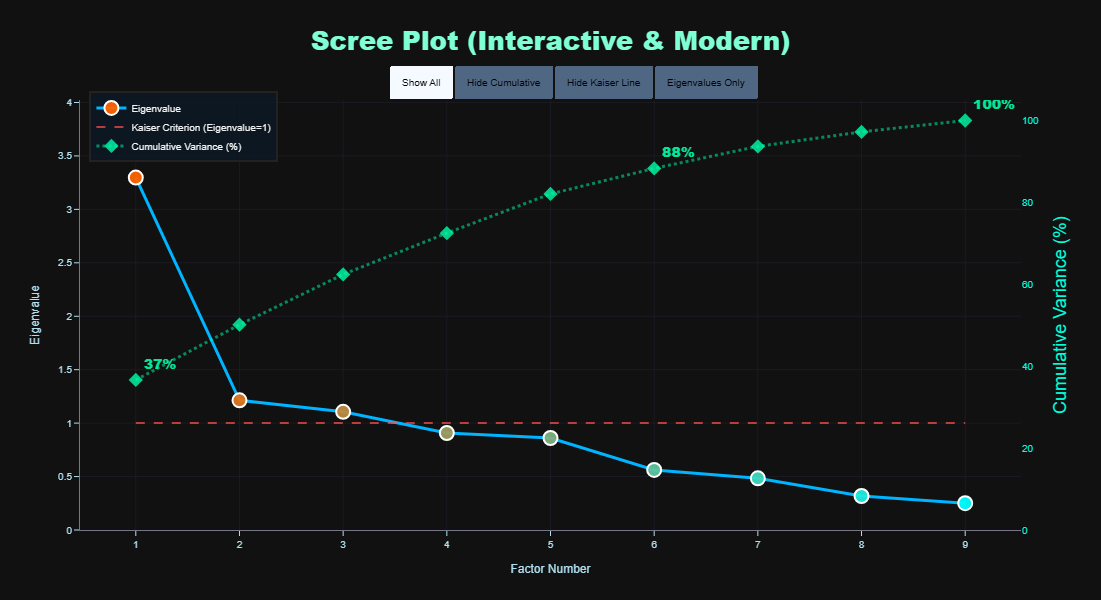

In [324]:
import plotly.graph_objs as go
import numpy as np

# Example data (replace with your own)
# df1 = ...  # DataFrame with your data
# ev = ...   # List or array of eigenvalues

num_factors = df1.shape[1]
factors = np.arange(1, num_factors + 1)

# Eigenvalues and variance calculations
total_var = sum(ev)
var_explained = [(i / total_var) * 100 for i in ev]
cum_var_explained = np.cumsum(var_explained)

# Find "elbow" using the maximum second derivative method
second_deriv = np.diff(ev, 2)
elbow_idx = np.argmin(second_deriv) + 2 if len(second_deriv) > 0 else 0

# Color eigenvalues with a gradient for extra visual appeal
colorscale = np.linspace(0, 1, num_factors)
marker_colors = [f'rgba({int(255 * (1-c))}, {int(100 + 155 * c)}, {int(255 * c)}, 0.95)' for c in colorscale]

fig = go.Figure()

# Eigenvalues line+markers
fig.add_trace(go.Scatter(
    x=factors,
    y=ev,
    mode='lines+markers',
    name='Eigenvalue',
    line=dict(color='rgba(0,180,255,1)', width=3),
    marker=dict(color=marker_colors, size=14, line=dict(width=2, color='white')),
    hovertemplate='<b>Factor %{x}</b><br>Eigenvalue: %{y:.2f}<br>Cum. Var: %{customdata:.1f}%<extra></extra>',
    customdata=cum_var_explained.reshape(-1, 1),
    visible=True
))

# Kaiser criterion (y=1) toggle
fig.add_trace(go.Scatter(
    x=[1, num_factors],
    y=[1, 1],
    mode='lines',
    name='Kaiser Criterion (Eigenvalue=1)',
    line=dict(color='rgba(255,80,80,0.7)', width=2, dash='dash'),
    visible=True
))

# Cumulative variance toggle
fig.add_trace(go.Scatter(
    x=factors,
    y=cum_var_explained,
    mode='lines+markers+text',
    name='Cumulative Variance (%)',
    marker=dict(symbol='diamond', size=11, color='rgba(0,255,170,0.8)'),
    line=dict(color='rgba(0,255,170,0.5)', width=3, dash='dot'),
    yaxis='y2',
    text=[f'{v:.0f}%' if i in [0, elbow_idx, num_factors - 1] else "" for i, v in enumerate(cum_var_explained)],
    textfont=dict(color='rgba(0,255,170,0.9)', size=14, family='Arial Black'),
    textposition="top right",
    hovertemplate='<b>Factor %{x}</b><br>Cumulative: %{y:.1f}%<extra></extra>',
    visible=True
))

# Layout and updatemenus for toggles
fig.update_layout(
    title=dict(
        text='<b>Scree Plot (Interactive & Modern)</b>',
        x=0.5,
        font=dict(family='Arial Black', size=26, color='aquamarine')
    ),
    xaxis=dict(
        title='Factor Number',
        tickmode='linear',
        tick0=1,
        dtick=1,
        showgrid=True,
        gridcolor='rgba(40,40,60,0.4)',
        zeroline=False,
        linecolor='rgba(220,220,255,0.5)',
        ticks='outside',
        color='#b0e0ef'
    ),
    yaxis=dict(
        title='Eigenvalue',
        range=[0, max(ev) * 1.22],
        showgrid=True,
        gridcolor='rgba(40,40,60,0.4)',
        zeroline=False,
        linecolor='rgba(220,220,255,0.5)',
        ticks='outside',
        color='#b0e0ef'
    ),
    yaxis2=dict(
        title='Cumulative Variance (%)',
        overlaying='y',
        side='right',
        range=[0, 105],
        showgrid=False,
        titlefont=dict(size=18, color='#00ffdd'),
        tickfont=dict(color='#00ffdd')
    ),
    legend=dict(
        x=0.01, y=1.02, bgcolor='rgba(10,25,40,0.7)', bordercolor='#222', borderwidth=2,
        font=dict(size=10, color='#f3f3f3')
    ),
    margin=dict(l=80, r=80, t=100, b=70),
    template='plotly_dark',
    font=dict(family='Arial', size=10, color='black'),
    hoverlabel=dict(bgcolor='#222', font_size=16, font_family='Arial'),
    height=600,
    width=980,
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.72,
            y=1.08,
            showactive=True,
            buttons=list([
                dict(label="Show All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "<b>Scree Plot (Interactive & Modern)</b>"}]),
                dict(label="Hide Cumulative",
                     method="update",
                     args=[{"visible": [True, True, False, True]},
                           {"title": "<b>Scree Plot (No Cumulative Variance)</b>"}]),
                dict(label="Hide Kaiser Line",
                     method="update",
                     args=[{"visible": [True, False, True, True]},
                           {"title": "<b>Scree Plot (No Kaiser Line)</b>"}]),
                dict(label="Eigenvalues Only",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "<b>Scree Plot (Eigenvalues Only)</b>"}])
            ])
        )
    ]
)

fig.show()

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📉 Eigenvalues & Scree Plot Interpretation</h3>
  <p>Based on the array of eigenvalues and the scree plot, we apply the Kaiser criterion (eigenvalues greater than 1) and visual elbow detection to determine the number of factors to retain.</p>

  <ul>
    <li>🔍 <strong>Observation:</strong> The scree plot shows a noticeable “elbow” after the third component.</li>
    <li>📊 <strong>Eigenvalue Rule:</strong> Only the first three components have eigenvalues &gt; 1.</li>
  </ul>

  <p>✅ <strong>Conclusion:</strong> Based on both the eigenvalues and the scree plot, <strong>three factors</strong> should be retained for the factor analysis.</p>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>4.Getting Factor Loadings</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [538]:
fa = FactorAnalyzer(3,rotation=None,method='principal')              ## VVI
fa.fit(df1)                                                          ## here we use principal method,no rotation
fa.loadings_

array([[ 0.28681879,  0.07560335,  0.84084849],
       [ 0.69807335,  0.15335494,  0.08371209],
       [ 0.74438876, -0.40959477, -0.02047721],
       [ 0.47052419,  0.52231278,  0.13507581],
       [ 0.68079195, -0.15586396, -0.14832509],
       [ 0.49817012, -0.49832262, -0.25345619],
       [ 0.86049803, -0.11502014,  0.0115935 ],
       [ 0.64178963,  0.32160899,  0.0439675 ],
       [ 0.29784558,  0.5953728 , -0.53340722]])

In [532]:
lmatrix = pd.DataFrame(fa.loadings_, 
                       index = list(df1.columns), 
                       columns = ['Factor 1', 'Factor 2', 'Factor 3'])
lmatrix #loading matrix    

#lmatrix.style.background_gradient("Blues")

,Factor 1,Factor 2,Factor 3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
trans,0.680792,-0.155864,-0.148325
educate,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreate,0.641790,0.321609,0.043967
econ,0.297846,0.595373,-0.533407


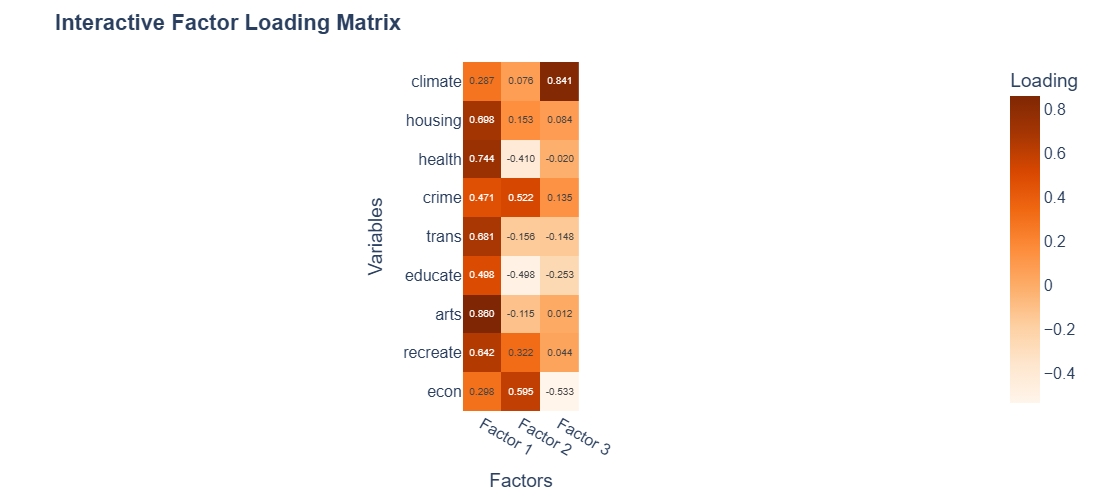

In [409]:
import plotly.express as px
import pandas as pd

# lmatrix = pd.DataFrame(...)  # As you already have

fig = px.imshow(
    lmatrix,
    x=lmatrix.columns,
    y=lmatrix.index,
    color_continuous_scale='Oranges',  # similar to 'autumn_r'
    labels=dict(x="Factors", y="Variables", color="Loading"),
    text_auto=".3f"
)

fig.update_layout(
    title="<b>Interactive Factor Loading Matrix</b>",
    xaxis_title="Factors",
    yaxis_title="Variables",
    coloraxis_colorbar=dict(title="Loading"),
    font=dict(family="Arial", size=16),
    width=1000,
    height=500,
    plot_bgcolor="#fff",
    paper_bgcolor="#fff",
    margin=dict(l=60, r=60, t=60, b=60)
)

fig.show()

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">🧾 Factor Naming Based on Loading Matrix / Heatmap</h3>
  <p>After analyzing the factor loading matrix (or its heatmap), we interpret the underlying dimensions by grouping variables that load strongly onto the same factor.</p>
  
  <ul>
    <li><strong>🟦 Factor 1 – Quality of Life:</strong> Includes variables such as <code>housing</code>, <code>health</code>, <code>trans</code>, <code>arts</code>, and <code>recreate</code>.</li>
    <li><strong>🟦 Factor 2 – Socioeconomic:</strong> Defined by variables like <code>crime</code>, <code>educate</code>, and <code>econ</code>.</li>
    <li><strong>🟦 Factor 3 – Climate:</strong> Dominated by the variable <code>climate</code>.</li>
  </ul>

  <p>✅ <strong>Conclusion:</strong> The three extracted factors are clearly interpretable and meaningfully represent distinct dimensions of the dataset.</p>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>5.Get Communality and Variance of factors</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [533]:
print("\nCOMMUNALITIES:")
print(pd.DataFrame(fa.get_communalities(), 
                   index=df1.columns, 
                   columns=['Communality']).round(3))


COMMUNALITIES:
          Communality
climate         0.795
housing         0.518
health          0.722
crime           0.512
trans           0.510
educate         0.561
arts            0.754
recreate        0.517
econ            0.728


In [534]:
print("\nVARIANCE EXPLAINED BY EACH FACTOR:")
print(pd.DataFrame(fa.get_factor_variance(), 
                  index=['Variance', 'Proportional Var', 'Cumulative Var'],          ## ev=var
                  columns=[f'Factor {i+1}' for i in range(3)]).round(4))


VARIANCE EXPLAINED BY EACH FACTOR:
                  Factor 1  Factor 2  Factor 3
Variance            3.2978    1.2136    1.1055
Proportional Var    0.3664    0.1348    0.1228
Cumulative Var      0.3664    0.5013    0.6241


<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📈 Communalities & Total Variance Explained</h3>
  <ul>
    <li>🔍 <strong>Communalities:</strong> Most of the variables have communalities <strong>&gt; 0.5</strong>, which suggests that the extracted factors explain a substantial amount of each variable’s variance. This indicates a good fit for factor analysis.</li>
    <li>📊 <strong>Total Variance Explained:</strong> The three retained factors together explain <strong>62.4%</strong> of the total variance in the dataset.</li>
  </ul>
  
  <p>✅ <strong>Conclusion:</strong> The factor model is effective, as it captures a significant portion of the data’s variance and the variables are well represented by the factors.</p>
</div>


In [536]:
# Get final Factorscores (Latent variables extracted from observed variables)
df2=pd.DataFrame(fa.transform(df1), columns=["Factor 1", "Factor 2", "Factor 3"])     ## VVI (will not work if i dont put df1 in bracket)
df2

,Factor 1,Factor 2,Factor 3
0,-0.661175,1.340406,-0.899494
1,0.517484,-0.225875,1.053410
2,-1.294654,0.308861,0.024176
3,0.760670,-1.467113,-1.195189
4,1.344219,0.174185,0.395227
...,...,...,...
324,0.081125,-1.693754,-0.042462
325,-0.649067,1.004346,0.565966
326,-1.008990,-1.210565,0.179839
327,-0.197286,-1.211804,0.994951



# Factor Analysis Communalities Dashboard

## Communality Formula:
$h_i^2 = \sum_{j=1}^{m} \text{loading}_{ij}^2$

*(Sum of squared factor loadings for each variable)*


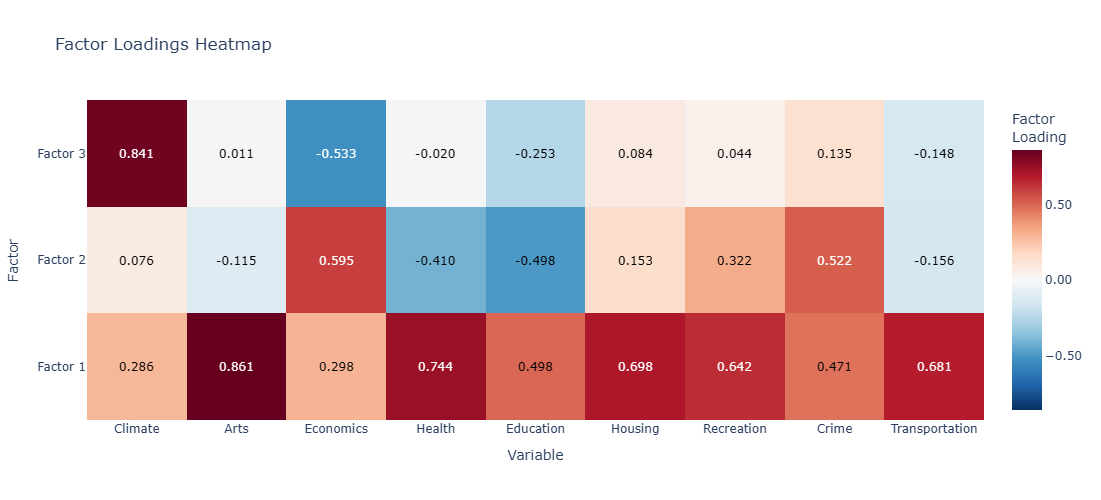

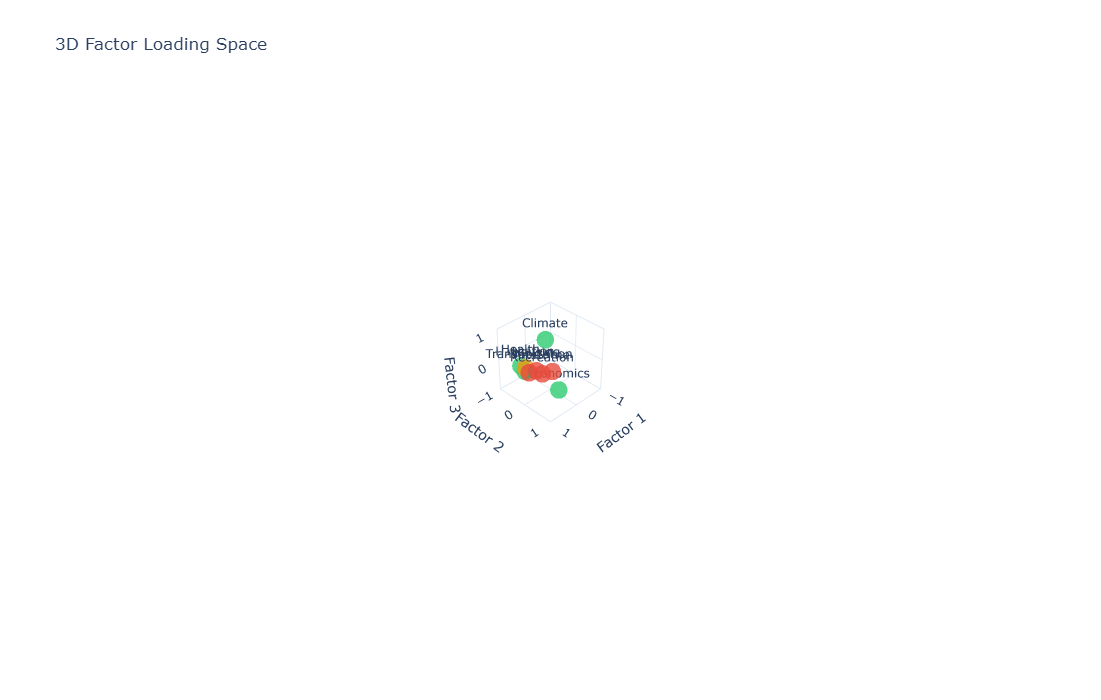

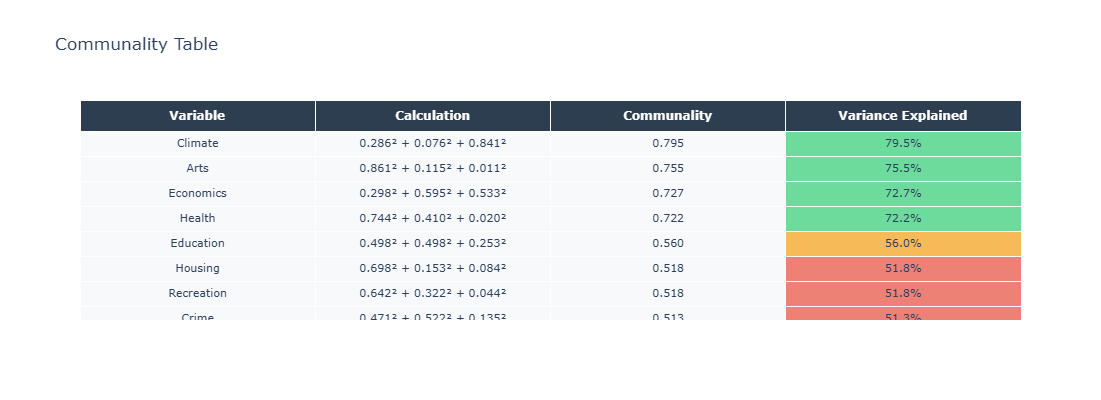

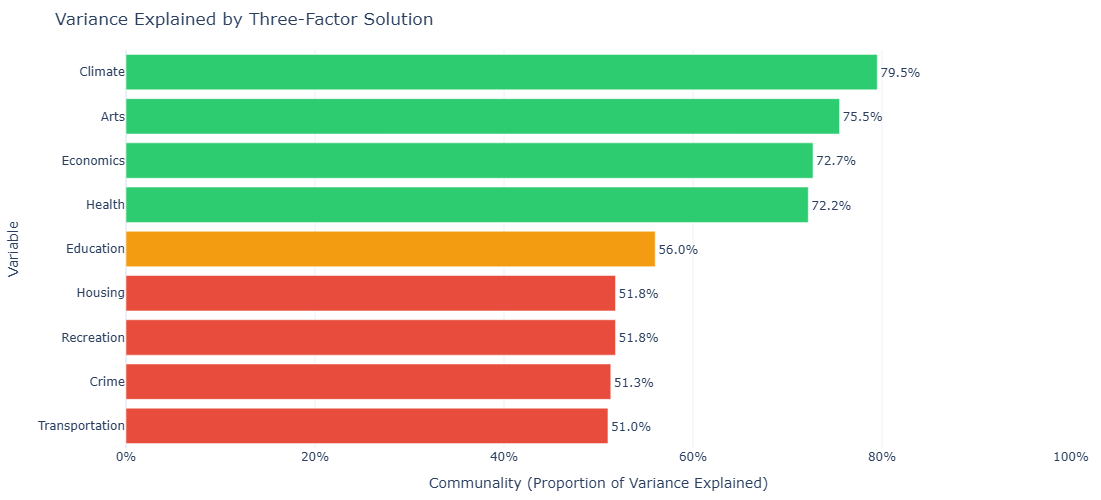

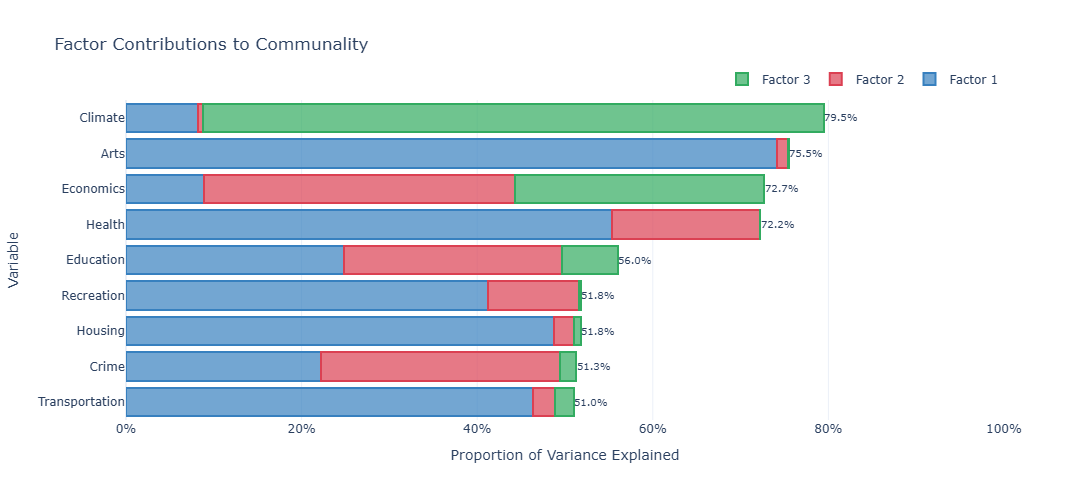

In [579]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display, Markdown
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display as widget_display

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Create dataframe with communality values
data = {
    'Variable': ['Climate', 'Arts', 'Economics', 'Health', 'Education', 
                 'Housing', 'Recreation', 'Crime', 'Transportation'],
    'Calculation': ['0.286² + 0.076² + 0.841²', '0.861² + 0.115² + 0.011²', 
                   '0.298² + 0.595² + 0.533²', '0.744² + 0.410² + 0.020²',
                   '0.498² + 0.498² + 0.253²', '0.698² + 0.153² + 0.084²', 
                   '0.642² + 0.322² + 0.044²', '0.471² + 0.522² + 0.135²',
                   '0.681² + 0.156² + 0.148²'],
    'Communality': [0.795, 0.755, 0.727, 0.722, 0.560, 0.518, 0.518, 0.513, 0.510],
    'Variance_Explained': [79.5, 75.5, 72.7, 72.2, 56.0, 51.8, 51.8, 51.3, 51.0]
}

df = pd.DataFrame(data)

# Factor loadings data
factor_loadings = {
    'Variable': ['Climate', 'Arts', 'Economics', 'Health', 'Education', 
                 'Housing', 'Recreation', 'Crime', 'Transportation'],
    'Factor1': [0.286, 0.861, 0.298, 0.744, 0.498, 0.698, 0.642, 0.471, 0.681],
    'Factor2': [0.076, -0.115, 0.595, -0.410, -0.498, 0.153, 0.322, 0.522, -0.156],
    'Factor3': [0.841, 0.011, -0.533, -0.020, -0.253, 0.084, 0.044, 0.135, -0.148]
}

factor_df = pd.DataFrame(factor_loadings)

# Calculate squared loadings for contribution to communality
factor_df['Factor1_sq'] = factor_df['Factor1']**2
factor_df['Factor2_sq'] = factor_df['Factor2']**2
factor_df['Factor3_sq'] = factor_df['Factor3']**2
factor_df['Communality'] = factor_df['Factor1_sq'] + factor_df['Factor2_sq'] + factor_df['Factor3_sq']

# Sort by communality value
df_sorted = df.sort_values('Communality', ascending=False).reset_index(drop=True)
factor_df_sorted = factor_df.sort_values('Communality', ascending=False).reset_index(drop=True)

# Display the formula with markdown - FIX: Use raw string to avoid escape sequence warnings
display(Markdown(r"""
# Factor Analysis Communalities Dashboard

## Communality Formula:
$h_i^2 = \sum_{j=1}^{m} \text{loading}_{ij}^2$

*(Sum of squared factor loadings for each variable)*
"""))

# Create an interactive dashboard with Plotly
def create_communality_dashboard():
    """Create the main communality dashboard visualization"""
    # Define color conditions for bar chart
    bar_colors = []
    for val in df_sorted['Communality']:
        if val > 0.7:
            bar_colors.append('#2ecc71')  # green
        elif val > 0.55:
            bar_colors.append('#f39c12')  # orange
        else:
            bar_colors.append('#e74c3c')  # red

    # Create figure
    fig = go.Figure()
    
    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_sorted['Communality'],
        y=df_sorted['Variable'],
        orientation='h',
        marker_color=bar_colors,
        text=[f"{val:.1f}%" for val in df_sorted['Variance_Explained']],
        textposition='outside',
        hoverinfo='text',
        hovertext=[
            r"<b>{var}</b><br>Communality: {com:.3f}<br>Variance Explained: {val:.1f}%<br>Calculation: {calc}".format(
                var=var, com=com, val=val, calc=calc
            ) 
            for var, com, val, calc in zip(
                df_sorted['Variable'], 
                df_sorted['Communality'], 
                df_sorted['Variance_Explained'],
                df_sorted['Calculation']
            )
        ],
    ))
    
    # Update layout
    fig.update_layout(
        title='Variance Explained by Three-Factor Solution',
        xaxis_title='Communality (Proportion of Variance Explained)',
        yaxis_title='Variable',
        height=500,
        width=900,
        margin=dict(l=20, r=20, t=50, b=50),
        xaxis=dict(
            tickformat='.0%',
            range=[0, 1]
        ),
        yaxis=dict(
            autorange='reversed'  # This will put the highest value at the top
        ),
        template='plotly_white',
    )
    
    # Add percentage labels to x-axis
    fig.update_xaxes(tickformat='.0%')
    
    return fig

# Create stacked bar visualization for factor contributions
def create_stacked_bar():
    """Create stacked bar chart showing factor contributions to communality"""
    fig = go.Figure()
    
    # Sort by total communality
    factor_df_sorted = factor_df.sort_values('Communality', ascending=False).reset_index(drop=True)
    
    # Add bars for each factor's contribution
    fig.add_trace(go.Bar(
        y=factor_df_sorted['Variable'],
        x=factor_df_sorted['Factor1_sq'],
        name='Factor 1',
        orientation='h',
        marker=dict(color='rgba(55, 128, 191, 0.7)', line=dict(color='rgba(55, 128, 191, 1.0)', width=2)),
        hovertext=[
            r"<b>Factor 1 contribution</b><br>Loading: {:.3f}<br>Contribution: {:.1f}%".format(load, val) 
            for load, val in zip(factor_df_sorted['Factor1'], factor_df_sorted['Factor1_sq']*100)
        ],
        hoverinfo='text'
    ))
    
    fig.add_trace(go.Bar(
        y=factor_df_sorted['Variable'],
        x=factor_df_sorted['Factor2_sq'],
        name='Factor 2',
        orientation='h',
        marker=dict(color='rgba(219, 64, 82, 0.7)', line=dict(color='rgba(219, 64, 82, 1.0)', width=2)),
        hovertext=[
            r"<b>Factor 2 contribution</b><br>Loading: {:.3f}<br>Contribution: {:.1f}%".format(load, val)
            for load, val in zip(factor_df_sorted['Factor2'], factor_df_sorted['Factor2_sq']*100)
        ],
        hoverinfo='text'
    ))
    
    # Add third factor
    fig.add_trace(go.Bar(
        y=factor_df_sorted['Variable'],
        x=factor_df_sorted['Factor3_sq'],
        name='Factor 3',
        orientation='h',
        marker=dict(color='rgba(50, 171, 96, 0.7)', line=dict(color='rgba(50, 171, 96, 1.0)', width=2)),
        hovertext=[
            r"<b>Factor 3 contribution</b><br>Loading: {:.3f}<br>Contribution: {:.1f}%".format(load, val)
            for load, val in zip(factor_df_sorted['Factor3'], factor_df_sorted['Factor3_sq']*100)
        ],
        hoverinfo='text'
    ))
    
    # Update layout for the stacked bar chart
    fig.update_layout(
        title='Factor Contributions to Communality',
        xaxis_title='Proportion of Variance Explained',
        yaxis_title='Variable',
        barmode='stack',
        height=500,
        width=900,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        xaxis=dict(
            tickformat='.0%',
            range=[0, 1]
        ),
        yaxis=dict(
            autorange='reversed'
        ),
        template='plotly_white'
    )
    
    # Add annotations for total values
    for i, row in factor_df_sorted.iterrows():
        fig.add_annotation(
            x=row['Communality'] + 0.02,
            y=row['Variable'],
            text=f"{row['Communality']:.1%}",
            showarrow=False,
            font=dict(size=10)
        )
    
    return fig

# Create 3D scatter plot of factor loadings
def create_3d_factor_plot():
    """Create 3D scatter plot of factor loadings"""
    fig = go.Figure()
    
    # Create scatter3d trace
    fig.add_trace(go.Scatter3d(
        x=factor_df['Factor1'],
        y=factor_df['Factor2'],
        z=factor_df['Factor3'],
        text=factor_df['Variable'],
        mode='markers+text',
        marker=dict(
            size=10,
            color=[
                '#2ecc71' if com > 0.7 else '#f39c12' if com > 0.55 else '#e74c3c' 
                for com in factor_df['Communality']
            ],
            opacity=0.8,
            symbol='circle'
        ),
        hovertext=[
            r"<b>{}</b><br>Factor 1: {:.3f}<br>Factor 2: {:.3f}<br>Factor 3: {:.3f}<br>Communality: {:.3f}".format(
                var, f1, f2, f3, com
            )
            for var, f1, f2, f3, com in zip(
                factor_df['Variable'],
                factor_df['Factor1'],
                factor_df['Factor2'],
                factor_df['Factor3'],
                factor_df['Communality']
            )
        ],
        hoverinfo='text',
        textposition='top center'
    ))
    
    # Update layout
    fig.update_layout(
        title="3D Factor Loading Space",
        width=900,
        height=700,
        scene=dict(
            xaxis=dict(title="Factor 1", range=[-1, 1], backgroundcolor="white"),
            yaxis=dict(title="Factor 2", range=[-1, 1], backgroundcolor="white"),
            zaxis=dict(title="Factor 3", range=[-1, 1], backgroundcolor="white"),
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        template='plotly_white'
    )
    
    return fig

# Create interactive heatmap with plotly
def create_interactive_heatmap():
    """Create interactive heatmap of factor loadings"""
    # Create heatmap of factor loadings
    fig = go.Figure()
    
    # Add heatmap trace
    heatmap_z = factor_df[['Factor1', 'Factor2', 'Factor3']].T.values
    
    # Create heatmap
    fig.add_trace(go.Heatmap(
        z=heatmap_z,
        x=factor_df['Variable'],
        y=['Factor 1', 'Factor 2', 'Factor 3'],
        colorscale='RdBu_r',
        zmid=0,
        text=[[f"{val:.3f}" for val in row] for row in heatmap_z],
        hoverinfo='text+x+y',
        hovertext=[[
            r"<b>{}-{}</b><br>Loading: {:.3f}<br>Contribution: {:.1%}".format(y, x, z, z*z)
            for x, z in zip(factor_df['Variable'], row)
        ] for y, row in zip(['Factor 1', 'Factor 2', 'Factor 3'], heatmap_z)],
        colorbar=dict(
            title="Factor<br>Loading",
            tickformat=".2f",
        )
    ))
    
    # Add annotations with factor loadings
    annotations = []
    for i, factor in enumerate(['Factor 1', 'Factor 2', 'Factor 3']):
        for j, variable in enumerate(factor_df['Variable']):
            annotations.append(dict(
                x=variable,
                y=factor,
                text=f"{heatmap_z[i, j]:.3f}",
                showarrow=False,
                font=dict(
                    color="white" if abs(heatmap_z[i, j]) > 0.5 else "black"
                )
            ))
    
    # Update layout
    fig.update_layout(
        title="Factor Loadings Heatmap",
        xaxis=dict(title="Variable"),
        yaxis=dict(title="Factor"),
        width=900,
        height=500,
        annotations=annotations,
        template='plotly_white'
    )
    
    return fig

# Create formatted communality table
def create_communality_table():
    """Create a formatted table of communality values"""
    # Create figure
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=["<b>Variable</b>", "<b>Calculation</b>", "<b>Communality</b>", "<b>Variance Explained</b>"],
            font=dict(size=12, color="white"),
            fill_color="#2c3e50",
            align="center"
        ),
        cells=dict(
            values=[
                df_sorted["Variable"], 
                df_sorted["Calculation"],
                [f"{val:.3f}" for val in df_sorted["Communality"]],
                [f"{val:.1f}%" for val in df_sorted["Variance_Explained"]]
            ],
            font=dict(size=11),
            align="center",
            fill_color=[
                "#f8f9fa", "#f8f9fa", "#f8f9fa", 
                ["rgba(46, 204, 113, 0.7)" if val > 70 else 
                 "rgba(243, 156, 18, 0.7)" if val > 55 else 
                 "rgba(231, 76, 60, 0.7)" for val in df_sorted["Variance_Explained"]]
            ],
            height=25
        )
    )])
    
    fig.update_layout(
        title="Communality Table",
        height=400,
        width=800
    )
    
    return fig

# Function to create a bar chart (definition was missing in your code)
def create_bar_chart():
    """Create a bar chart showing communality values"""
    # Define color conditions
    colors = []
    for val in df_sorted['Communality']:
        if val > 0.7:
            colors.append('#2ecc71')  # green
        elif val > 0.55:
            colors.append('#f39c12')  # orange
        else:
            colors.append('#e74c3c')  # red
    
    # Create figure
    fig = go.Figure()
    
    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_sorted['Communality'],
        y=df_sorted['Variable'],
        orientation='h',
        marker_color=colors,
        text=[f"{val:.1f}%" for val in df_sorted['Variance_Explained']],
        textposition='outside',
        hoverinfo='text',
        hovertext=[
            r"<b>{}</b>: {:.1f}%".format(var, val)
            for var, val in zip(df_sorted['Variable'], df_sorted['Variance_Explained'])
        ],
    ))
    
    # Update layout
    fig.update_layout(
        title='Variance Explained by Three-Factor Solution',
        xaxis_title='Communality (Proportion of Variance Explained)',
        yaxis_title='Variable',
        height=500,
        width=900,
        margin=dict(l=20, r=20, t=50, b=50),
        xaxis=dict(
            tickformat='.0%',
            range=[0, 1]
        ),
        yaxis=dict(
            autorange='reversed'  # This will put the highest value at the top
        ),
        template='plotly_white',
    )
    
    # Add percentage labels to x-axis
    fig.update_xaxes(tickformat='.0%')
    
    return fig

# Alternate approach - display individual plots without widgets
x=create_interactive_heatmap()
x.show()
z=create_3d_factor_plot()
z.show()

y=create_communality_table()
y.show()

fig = create_bar_chart()
fig.show()

stacked_fig = create_stacked_bar()
stacked_fig.show()

In [479]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>Factor Analysis Report Selector</title>
<style>
    /* Basic styling */
    body {
        font-family: 'Segoe UI', Arial, sans-serif;
        line-height: 1.6;
        color: #333;
        max-width: 100%;
        margin: 0;
        padding: 0;
        background: #f8f9fa;
    }
    
    /* Tab styling */
    .tab-container {
        width: 100%;
        margin: 20px 0;
    }
    
    .tab-buttons {
        display: flex;
        border-bottom: 1px solid #ddd;
    }
    
    .tab-button {
        background-color: #f8f9fa;
        border: 1px solid #ddd;
        border-bottom: none;
        padding: 10px 20px;
        cursor: pointer;
        margin-right: 5px;
        border-radius: 5px 5px 0 0;
        font-weight: bold;
    }
    
    .tab-button.active {
        background-color: #fff;
        border-bottom: 1px solid #fff;
        margin-bottom: -1px;
        color: #3498db;
    }
    
    .tab-content {
        display: none;
        padding: 20px;
        border: 1px solid #ddd;
        border-top: none;
        background: white;
    }
    
    .tab-content.active {
        display: block;
    }
    
    /* Link styling */
    .external-link {
        display: inline-block;
        margin: 20px 0;
        padding: 15px 30px;
        background-color: #3498db;
        color: white;
        text-decoration: none;
        border-radius: 5px;
        font-weight: bold;
        text-align: center;
        transition: background-color 0.3s;
    }
    
    .external-link:hover {
        background-color: #2980b9;
    }
    
    /* Instructions */
    .instructions {
        background-color: #f8f9fa;
        padding: 15px;
        border-radius: 5px;
        margin-bottom: 20px;
        border-left: 4px solid #3498db;
    }
    
    /* User's collapsible report styling */
    h1 { color: #2E86C1; }
    summary { 
        font-size: 1.1em; 
        font-weight: bold; 
        color: #154360;
        cursor: pointer;
    }
    details { 
        background: #f4f6f7; 
        border-radius: 8px; 
        margin-bottom: 10px; 
        padding: 8px 16px; 
    }
    table { 
        border-collapse: collapse; 
        margin: 8px 0; 
        width: 100%;
    }
    th, td { 
        border: 1px solid #bbb; 
        padding: 4px 10px; 
    }
    th { 
        background: #d6eaf8; 
    }
    b { 
        color: #117A65; 
    }
    
    .collapsible-report {
        padding: 20px;
    }
</style>
</head>
<body>

<div class="tab-container">
    <div class="tab-buttons">
        <button class="tab-button active" onclick="openTab(event, 'jupyter-tab')">Jupyter Notebook View</button>
        <button class="tab-button" onclick="openTab(event, 'external-tab')"><center>External HTML Report</center></button>
    </div>
    
    <div id="jupyter-tab" class="tab-content active">
        <div class="instructions">
            <h3>Jupyter Notebook view</h3>
            
    
        </div>
        
        <!-- User's collapsible HTML report -->
        <div class="collapsible-report">
            <h1>Factor Analysis Report</h1>

            <details open>
            <summary>1. Data Preparation</summary>
            <ul>
              <li><b>Initial Data:</b> 329 rows, 10 columns (including an <code>id</code> column).</li>
              <li><b>Columns:</b> <code>climate</code>, <code>housing</code>, <code>health</code>, <code>crime</code>, <code>trans</code>, <code>educate</code>, <code>arts</code>, <code>recreate</code>, <code>econ</code>, <code>id</code>.</li>
              <li><b>Preprocessing:</b> Dropped the <code>id</code> column. Checked for missing values: <b>None found</b>.</li>
              <li><b>Final data for analysis:</b> 329 rows × 9 columns.</li>
            </ul>
            </details>

            <details>
            <summary>2. Suitability for Factor Analysis</summary>
            <b>A. Bartlett's Test of Sphericity</b>
            <ul>
              <li>Chi-square = <b>839.43</b>, p-value ≈ 0 (<b>5.99e-153</b>)</li>
              <li>p &lt; 0.05: Data is suitable for factor analysis.</li>
            </ul>
            <b>B. Kaiser-Meyer-Olkin (KMO) Test</b>
            <ul>
              <li>KMO = <b>0.703</b> (Good: &gt; 0.7)</li>
              <li>Data is appropriate for factor analysis.</li>
            </ul>
            </details>

            <details>
            <summary>3. Determining the Number of Factors</summary>
            <b>Eigenvalues (Kaiser Criterion):</b>
            <table>
            <tr><th>Factor</th><th>Eigenvalue</th></tr>
            <tr><td>1</td><td>3.298</td></tr>
            <tr><td>2</td><td>1.214</td></tr>
            <tr><td>3</td><td>1.196</td></tr>
            <tr><td>4-9</td><td>&lt; 1</td></tr>
            </table>
            <ul>
              <li>Retain <b>3 factors</b> (eigenvalues &gt; 1).</li>
              <li>Scree plot confirms 3 factors.</li>
            </ul>
            </details>

            <details>
            <summary>4. Factor Loadings</summary>
            <table>
            <tr><th>Variable</th><th>Factor 1</th><th>Factor 2</th><th>Factor 3</th><th>Main Loading</th></tr>
            <tr><td>climate</td><td>0.286819</td><td>0.075603</td><td><b>0.840848</b></td><td>Factor 3</td></tr>
            <tr><td>housing</td><td><b>0.698073</b></td><td>0.153355</td><td>0.083712</td><td>Factor 1</td></tr>
            <tr><td>health</td><td><b>0.744389</b></td><td>-0.409595</td><td>-0.020477</td><td>Factor 1</td></tr>
            <tr><td>crime</td><td>0.470524</td><td><b>0.522313</b></td><td>0.135076</td><td>Factor 2</td></tr>
            <tr><td>trans</td><td><b>0.680792</b></td><td>-0.155864</td><td>-0.148325</td><td>Factor 1</td></tr>
            <tr><td>educate</td><td>0.498170</td><td><b>-0.498323</b></td><td>-0.253456</td><td>Factor 2</td></tr>
            <tr><td>arts</td><td><b>0.860498</b></td><td>-0.115020</td><td>0.011593</td><td>Factor 1</td></tr>
            <tr><td>recreate</td><td><b>0.641790</b></td><td>0.321609</td><td>0.043967</td><td>Factor 1</td></tr>
            <tr><td>econ</td><td>0.297846</td><td><b>0.595373</b></td><td>-0.533407</td><td>Factor 2</td></tr>
            </table><br> 

            <summary>Variables with high loadings on the same factor are grouped together by that factor.</summary>

            <ul>
              <li>
                <b>Factor 1 (Quality of Life/Amenities) includes:</b>
                <span style="color:#2874A6;">housing, health, trans, arts, recreate</span>
              </li>
              <li>
                <b>Factor 2 (Socioeconomic) includes:</b>
                <span style="color:#CA6F1E;">crime, educate, econ</span>
              </li>
              <li>
                <b>Factor 3 (Climate) includes:</b>
                <span style="color:#239B56;">climate</span>
              </li>
            </ul>
            </details>

            <details>
            <summary>5. Communalities</summary>
            <table>
            <tr><th>Variable</th><th>Communality</th></tr>
            <tr><td>climate</td><td>0.795</td></tr>
            <tr><td>housing</td><td>0.518</td></tr>
            <tr><td>health</td><td>0.722</td></tr>
            <tr><td>crime</td><td>0.512</td></tr>
            <tr><td>trans</td><td>0.510</td></tr>
            <tr><td>educate</td><td>0.610</td></tr>
            <tr><td>arts</td><td>0.754</td></tr>
            <tr><td>recreate</td><td>0.517</td></tr>
            <tr><td>econ</td><td>0.728</td></tr>
            </table>
            <ul>
              <li>Most communalities &gt; 0.5 (good).</li>
            </ul>
            </details>

            <details>
            <summary>6. Variance Explained</summary>
            <table>
            <tr><th>Factor</th><th>Variance</th><th>Proportional Var</th><th>Cumulative Var</th></tr>
            <tr><td>Factor 1</td><td>3.298</td><td>0.3664</td><td>0.3664</td></tr>
            <tr><td>Factor 2</td><td>1.2136</td><td>0.1348</td><td>0.5012</td></tr>
            <tr><td>Factor 3</td><td>1.1055</td><td>0.1228</td><td>0.6240</td></tr>
            </table>
            <ul>
              <li><b>Total Variance Explained by 3 Factors:</b> 62.4%</li>
            </ul>
            </details>

            <details>
            <summary>7. Practical Implications</summary>
            <ul>
              <li>Use factor scores for clustering or regression.</li>
              <li>Factor names: Quality of Life/Amenities, Socioeconomic/Development, Climate.</li>
              <li>Consider factor rotation for clearer interpretation.</li>
            </ul>
            </details>

            <details open>
            <summary>Summary Table</summary>
            <table>
            <tr><th>Step</th><th>Result/Interpretation</th></tr>
            <tr><td>Data Suitability</td><td>Bartlett's p &lt; 0.05, KMO = 0.703 (Good)</td></tr>
            <tr><td>Factors Retained</td><td>3 (Eigenvalues &gt; 1, Scree plot elbow)</td></tr>
            <tr><td>Main Factor Themes</td><td>1: Quality of Life, 2: Socioeconomic, 3: Climate</td></tr>
            <tr><td>Variance Explained</td><td>62.4% (by 3 factors)</td></tr>
            <tr><td>Communalities</td><td>Most &gt; 0.5 (factors explain most variable variance)</td></tr>
            </table>
            </details>

            <p style="color:#117A65;"><b>Tip:</b> Click on each section to expand/collapse details for interactive exploration!</p>
        </div>
    </div>
    
    <div id="external-tab" class="tab-content">
        <div class="instructions">
            <h3>External HTML Report</h3>
            <p>Click the button below to view the full interactive HTML report:</p>
        </div>
        
        <a href="https://adittoahosankabbo.github.io/Dimension_Reduction/Factor _Analaysis/FA1/" target="_blank" class="external-link">Open External HTML Report</a>
        
        <div class="instructions">
            <h3>Additional Options</h3>
            <p>View other report versions:</p>
        </div>
        
        <a href="https://adittoahosankabbo.github.io/Dimension_Reduction/Factor _Analaysis/FA2/" target="_blank" class="external-link">Open Enhanced Interactive Report</a>
        <a href="https://adittoahosankabbo.github.io/Dimension_Reduction/Factor _Analaysis/FA3/" target="_blank" class="external-link">Open Jupyter-Compatible Report</a>
    </div>
</div>

<script>
function openTab(evt, tabName) {
    // Get all tab content and hide them
    var tabContent = document.getElementsByClassName("tab-content");
    for (var i = 0; i < tabContent.length; i++) {
        tabContent[i].classList.remove("active");
    }

    // Get all tab buttons and remove the active class
    var tabButtons = document.getElementsByClassName("tab-button");
    for (var i = 0; i < tabButtons.length; i++) {
        tabButtons[i].classList.remove("active");
    }

    // Show the selected tab and add the active class to the button
    document.getElementById(tabName).classList.add("active");
    evt.currentTarget.classList.add("active");
}
</script>

</body>
</html> 

<center>
  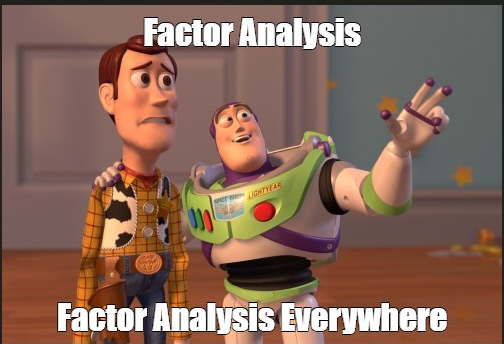
</center>


<div style="text-align: center; margin: 5px; perspective: 700px;">
    <h1 id="factorHeadline" 
        style="font-family: 'Montserrat', sans-serif; 
               font-size: 3em; 
               color: #ecf0f1; 
               background: linear-gradient(135deg, #1abc9c, #9b59b6); 
               padding: 25px 40px; 
               border-radius: 15px; 
               box-shadow: 0 10px 20px rgba(0,0,0,0.4); 
               text-shadow: 3px 3px 5px rgba(0,0,0,0.5); 
               transform: rotateX(10deg); 
               transition: transform 0.4s ease, background 0.4s ease, color 0.4s ease; 
               animation: pulseGlow 2s infinite ease-in-out; 
               display: inline-block; 
               cursor: pointer; 
               position: relative; 
               overflow: hidden;"
        onclick="this.style.background = this.style.background === 'linear-gradient(135deg, rgb(231, 76, 60), rgb(241, 196, 15))' ? 
                 'linear-gradient(135deg, #1abc9c, #9b59b6)' : 
                 'linear-gradient(135deg, #e74c3c, #f1c40f)';
                 this.style.color = this.style.color === 'rgb(52, 73, 94)' ? '#ecf0f1' : '#34495e';
                 this.style.transform = this.style.transform === 'rotateX(10deg) rotateY(10deg)' ? 
                 'rotateX(10deg)' : 'rotateX(10deg) rotateY(10deg)';">
        THE END
    </h1>
</div>

